# Resultado de la ronda en función de la economía

Bibliotecas necesarias para la ejecución

In [1]:
import pyodbc 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Definición de parámetros para la conexión con la base de datos

In [2]:
conn_str_esea = (
    r'Driver={SQL Server};'
    r'Server=localhost\MSSQLSERVER01;'
    r'Database=csgo_esea;'
    r'Trusted_Connection=yes;'
    )
cnxn = pyodbc.connect(conn_str_esea)

Definición de query de obtención de datos

In [42]:
query = "SELECT winner_side,case when [winner_side]='Terrorist' then 'orange' else 'blue' end as color,[ct_eq_val],[t_eq_val] FROM [csgo_esea].[dbo].[meta]"

Carga de datos en dataframes

In [44]:
data = pd.read_sql_query(query, cnxn)

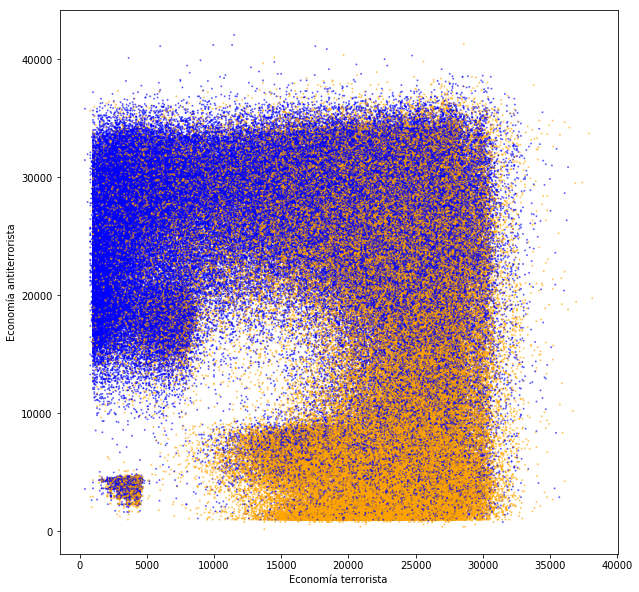

In [45]:
plt.figure(figsize=(10,10))

x = data['t_eq_val']
y = data['ct_eq_val']


fig = plt.scatter(x, y, s = 1, c = data['color'],alpha=0.5)
plt.xlabel('Economía terrorista')
plt.ylabel('Economía antiterrorista')
plt.show()